Our expectations: https://docs.google.com/document/d/1GYsmMG-CwEwakkOSN-LFgtitBdbR00y5iBy99sZl-BU/edit
### 1. Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Load data

In [100]:
# Load cleaned successful data
s_projects = pd.read_csv('./data/projects/projects_cleaned.csv')
s_rewards = pd.read_csv('./data/rewards/rewards_cleaned.csv')
s_creaters = pd.read_csv('./data/creaters/creaters_cleaned.csv')

# Clear two unamed columns
s_projects.drop('Unnamed: 0', inplace = True, axis=1)
s_rewards.drop('Unnamed: 0', inplace = True, axis=1)
s_creaters.drop('Unnamed: 0', inplace = True, axis=1)

# Drop duplicates
s_projects = s_projects.drop_duplicates()
s_creaters = s_creaters.drop_duplicates()
s_rewards = s_rewards.drop_duplicates()


In [101]:
# Load cleaned failed data
f_projects = pd.read_csv('./data/failed/projects_cleaned.csv')
f_rewards = pd.read_csv('./data/failed/rewards.csv')
f_creaters = pd.read_csv('./data/failed/creaters.csv')

# Clear two unamed columns
f_projects.drop('Unnamed: 0', inplace = True, axis=1)
f_rewards.drop('Unnamed: 0', inplace = True, axis=1)
f_creaters.drop('Unnamed: 0', inplace = True, axis=1)

# Filter some successful projects
filter_ = f_projects[f_projects['status'] == 'Successful']
s_links = filter_[['pro_link','creater_link']]
f_projects = f_projects[f_projects['status'] == 'Failed']
for _,l in s_links.iterrows():
    f_rewards = f_rewards[f_rewards['pro_link'] != l['pro_link']]
    f_creaters = f_creaters[f_creaters['creater_link'] != l['creater_link']]

# Drop duplicates
f_projects = f_projects.drop_duplicates()
f_creaters = f_creaters.drop_duplicates()
f_rewards = f_rewards.drop_duplicates()


#### Clean data again

In [126]:
# Remove outliers of data
s_projects = s_projects[s_projects['percentage_fund'] < 1000] # some projects have millions percentage funds


In [127]:
# Clean backers, because some of them will be greater than 1000, ex: 1,160
def clean_backers(backers):
    try:
        res = float(backers)
    except:
        res = float(backers.replace(',',''))
    return res

In [143]:
s_projects['backers'] = s_projects['backers'].apply(lambda x: clean_backers(x))
f_projects['backers'] = s_projects['backers'].apply(lambda x: clean_backers(x))
s_rewards['num_backers'] = s_rewards['num_backers'].apply(lambda x: clean_backers(x))
f_rewards['num_backers'] = s_rewards['num_backers'].apply(lambda x: clean_backers(x))

In [148]:
# Change all of thumnail_type to lower case
s_projects['thumbnail_type'] = s_projects['thumbnail_type'].apply(lambda x: x.lower())

In [156]:
s_projects.head()

,backers,creater_link,end_date,funded,language,max_price,min_price,num_comments,num_contributions,num_news,number_rewards,percentage_fund,pro_link,short_des,status,subcategory,target,thumbnail_type,title
0,244.0,https://www.kisskissbankbank.com/en/users/chic...,2018-12-06,13345.0,fr,10001.0,5.0,49.0,244.0,3.0,13.0,111.0,https://www.kisskissbankbank.com/en/projects/c...,"aidez, atteindre, 15, 000e, chiche, mobile, no...",Successful,NaN,12000.0,jpg,CHICHE se lance dans le pois chiche chocolaté !
1,49.0,https://www.kisskissbankbank.com/en/users/van-...,2018-12-06,3848.0,fr,100.0,5.0,6.0,49.0,0.0,4.0,101.0,https://www.kisskissbankbank.com/en/projects/r...,"trouver, seul, clic, tous, évènements, automob...",Successful,NaN,3800.0,png,RDV! Le site qui appartient aux passionnés d'a...
2,823.0,https://www.kisskissbankbank.com/en/users/mc4--2,2018-12-05,47400.0,fr,200.0,5.0,169.0,823.0,7.0,3.0,237.0,https://www.kisskissbankbank.com/en/projects/l...,"après, avoir, disparu, pendant, près, 80, ans,...",Successful,NaN,20000.0,jpg,LA MARCHE DES LOUPS
3,96.0,https://www.kisskissbankbank.com/en/users/baln...,2018-12-05,115.0,fr,1500.0,30.0,24.0,106.0,3.0,11.0,128.0,https://www.kisskissbankbank.com/en/projects/b...,"découvrez, marque, balnoir, paris, lancement, ...",Successful,NaN,90.0,png,"Balnoir Paris, la parfaite petite robe noire"
4,228.0,https://www.kisskissbankbank.com/en/users/luci...,2018-12-05,20511.0,en,1200.0,5.0,34.0,205.0,18.0,11.0,137.0,https://www.kisskissbankbank.com/en/projects/h...,"israeli, palestinian, doctors, work, together,...",Successful,NaN,15000.0,jpg,HEALING HEARTS // UNE HISTOIRE DE COEURS


### 3. Data descriptions

#### 3.1 Number of projects, rewards, creators we have, both successful and failed

In [149]:
print('The number of successful projects: {}'.format(s_projects.shape[0]))
print('The number of successful rewards: {}'.format(s_rewards.shape[0]))
print('The number of successful creaters: {}'.format(s_creaters.shape[0]))

print('The number of failed projects: {}'.format(f_projects.shape[0]))
print('The number of failed rewards: {}'.format(f_rewards.shape[0]))
print('The number of failed creaters: {}'.format(f_creaters.shape[0]))

The number of successful projects: 11818
The number of successful rewards: 110993
The number of successful creaters: 11181
The number of failed projects: 221
The number of failed rewards: 1535
The number of failed creaters: 220


#### 3.2 The average, median, standard deviation of percentage_fund

In [135]:
percentage_fund = pd.concat([s_projects['percentage_fund'],f_projects['percentage_fund']])
print('Mean of percentage_fund: {}'.format(percentage_fund.mean()))
print('Standard deviation of percentage_fund: {}'.format(percentage_fund.std()))
print('Max of percentage_fund: {}'.format(percentage_fund.max()))
print('Min of percentage_fund: {}'.format(percentage_fund.min()))
print('Median of percentage_fund: {}'.format(percentage_fund.median()))

Mean of percentage_fund: 120.4745410748401
Standard deviation of percentage_fund: 52.77545554511748
Max of percentage_fund: 956.0
Min of percentage_fund: 0.0
Median of percentage_fund: 107.0


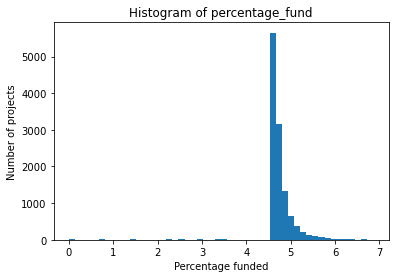

In [164]:
plt.hist(np.log(percentage_fund[percentage_fund != 0]),bins=50)
plt.xlabel('Percentage funded')
plt.ylabel('Number of projects')
plt.title('Histogram of percentage_fund')
plt.show()

#### 3.3 The average, median, standard deviation of funded, target

In [137]:
funded = pd.concat([s_projects['funded'],f_projects['funded']])
print('Mean of funded: {}'.format(funded.mean()))
print('Standard deviation of funded: {}'.format(funded.std()))
print('Max of funded: {}'.format(funded.max()))
print('Min of funded: {}'.format(funded.min()))
print('Median of funded: {}'.format(funded.median()))

Mean of funded: 6327.1797491486
Standard deviation of funded: 11416.380325185257
Max of funded: 444390.0
Min of funded: 0.0
Median of funded: 4320.0


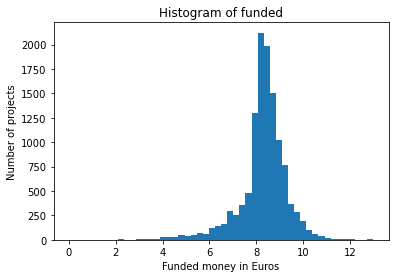

In [163]:
plt.hist(np.log(funded[funded != 0]),bins=50)
plt.xlabel('Funded money in Euros')
plt.ylabel('Number of projects')
plt.title('Histogram of funded')
plt.show()

In [144]:
target = pd.concat([s_projects['target'],f_projects['target']])
print('Mean of target: {}'.format(target.mean()))
print('Standard deviation of target: {}'.format(target.std()))
print('Max of target: {}'.format(target.max()))
print('Min of target: {}'.format(target.min()))
print('Median of target: {}'.format(target.median()))

Mean of target: 5316.945178170944
Standard deviation of target: 8138.254335788316
Max of target: 360000.0
Min of target: 5.0
Median of target: 4000.0


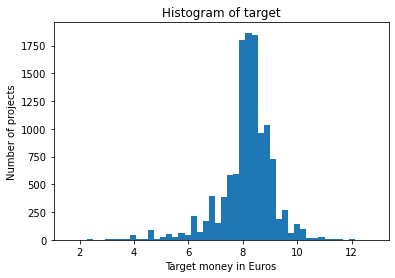

In [161]:
plt.hist(np.log(target),bins=50)
plt.xlabel('Target money in Euros')
plt.ylabel('Number of projects')
plt.title('Histogram of target')
plt.show()

#### 3.4 The average, median, standard deviation of backers

In [140]:
backers = pd.concat([s_projects['backers'],f_projects['backers']])
print('Mean of backers: {}'.format(backers.mean()))
print('Standard deviation of backers: {}'.format(backers.std()))
print('Max of backers: {}'.format(backers.max()))
print('Min of backers: {}'.format(backers.min()))
print('Median of backers: {}'.format(backers.median()))

Mean of backers: 97.34927949061662
Standard deviation of backers: 205.6162643503152
Max of backers: 10266.0
Min of backers: 1.0
Median of backers: 66.0


D:\Anaconda\Install\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\Install\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


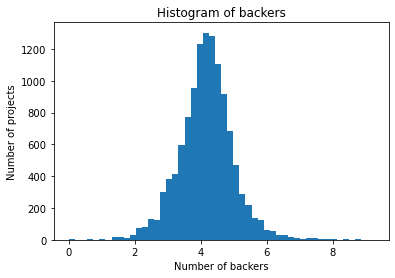

In [160]:
plt.figure()
plt.hist(np.log(backers),bins=50)
plt.xlabel('Number of backers')
plt.ylabel('Number of projects')
plt.title('Histogram of backers')
plt.show()

#### 3.5 The number of projects that have thumbnail is an jpeg, png, gif, or svg

In [155]:
thumbnail_type = pd.concat([s_projects['thumbnail_type'],f_projects['thumbnail_type']])
print('The number of projects with jpeg thumbnail: {}'.format(len(thumbnail_type[(thumbnail_type == 'jpg') | (thumbnail_type == 'jpg')])))
print('The number of projects with png thumbnail: {}'.format(len(thumbnail_type[thumbnail_type == 'png'])))
print('The number of projects with gif thumbnail: {}'.format(len(thumbnail_type[thumbnail_type == 'gif'])))
print('The number of projects with svg thumbnail: {}'.format(len(thumbnail_type[thumbnail_type == 'svg'])))


The number of projects with jpeg thumbnail: 8560
The number of projects with png thumbnail: 2582
The number of projects with gif thumbnail: 497
The number of projects with svg thumbnail: 1


#### 3.6 The average, median, standard deviation of the number of rewards

In [157]:
number_rewards = pd.concat([s_projects['number_rewards'],f_projects['number_rewards']])
print('Mean of number_rewards: {}'.format(number_rewards.mean()))
print('Standard deviation of number_rewards: {}'.format(number_rewards.std()))
print('Max of number_rewards: {}'.format(number_rewards.max()))
print('Min of number_rewards: {}'.format(number_rewards.min()))
print('Median of number_rewards: {}'.format(number_rewards.median()))

Mean of number_rewards: 8.560096353517734
Standard deviation of number_rewards: 4.15237948434103
Max of number_rewards: 143.0
Min of number_rewards: 0.0
Median of number_rewards: 8.0


#### 3.7 The average, median, standard deviation of the number of comments

In [159]:
num_comments = pd.concat([s_projects['num_comments'],f_projects['num_comments']])
print('Mean of num_comments: {}'.format(num_comments.mean()))
print('Standard deviation of num_comments: {}'.format(num_comments.std()))
print('Max of num_comments: {}'.format(num_comments.max()))
print('Min of num_comments: {}'.format(num_comments.min()))
print('Median of num_comments: {}'.format(num_comments.median()))

Mean of num_comments: 19.595398288894426
Standard deviation of num_comments: 50.22404711104708
Max of num_comments: 4394.0
Min of num_comments: 0.0
Median of num_comments: 13.0


#### 3.8 The number of words in each text, the most frequent words, the number of spelling errors

### 4. Analysis

#### 4.1 Tables

##### 4.1.1 The number of successful and failed projects by year & The number of projects that have subcategories by year


##### 4.1.2 The average number of comments regarding the language

##### 4.1.3 Comparing 2020 with other years, due to COVID 19:

#### 4.2 Graphs

##### 4.2.1 Bar chart: The number of successful and failed projects for each language


##### 4.2.2 Bar chart, line: Total funded by year, a total of successful projects per year

##### 4.2.3 Bar chart: The number of backers per year

##### 4.2.4 Correlation map

#### 4.3 Linear Regression

##### 4.3.1 y = percentage_fund, x = the remaining features, except: pro_link, title, is_successful, end_date, num_contributions, and creater_link

##### 4.3.2 y = is_successful, x = the remaining features, except: pro_link, title, percentage_fund, end_date, num_contributions, and creater_link


##### 4.3.3 y = num_backers, x = price, min_price, max_price, has_media

##### 4.3.4 y = percentage_fund, x = num_created, num_backed, num_follwed